In [112]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [374]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [375]:
start = '2020-01-01'
end = '2022-03-03'

market = 'GE'
df = yf.download(market, start=start, end=end)




[*********************100%***********************]  1 of 1 completed


In [376]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                       open=df['Open'],
                       high=df['High'],
                       low=df['Low'],
                       close=df['Close'])]) 
                       

In [377]:
fig.show()

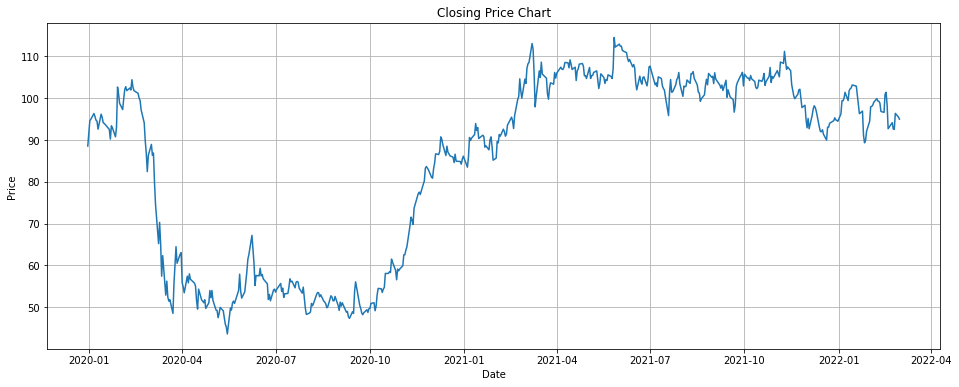

In [378]:
plt.figure(figsize=(16,6))
plt.plot(df['Adj Close'])
plt.title('Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [379]:
df["Gain"]=(df["Adj Close"].pct_change())*100
print('stock '+ symbol1 + ' Mean:', df["Gain"].mean())
print('stock '+ symbol1 + ' Variances:', df["Gain"].var())

stock USD Mean: 0.0610834400666156
stock USD Variances: 9.651409918210774


In [380]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.


In [381]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [382]:
import statistics as st

print('Mean of returns:', st.mean(returns))
print('Median of returns:', st.median(returns))
print('Median Low of returns:', st.median_low(returns))
print('Median High of returns:', st.median_high(returns))
print('Median Grouped of returns:', st.median_grouped(returns))
print('Mode of returns:', st.mode(returns))

Mean of returns: 0.0006108344006661561
Median of returns: -0.0009495090876237011
Median Low of returns: -0.0009495090876237011
Median High of returns: -0.0009495090876237011
Median Grouped of returns: -0.0009495090876237011
Mode of returns: 0.0


In [383]:
from statistics import mode

print('Mode of returns:', mode(returns))

hist, bins = np.histogram(returns, 20)
maxfreq = max(hist)
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of returns: 0.0
Mode of bins: [(-0.017091045911846292, -0.0021464525953951985)]


In [384]:
print('Arithmetic average of returns:\n')
print(returns.mean())

Arithmetic average of returns:

0.0006108344006661561


In [385]:
Start = 5000
df['Shares'] = 0
df['PnL'] = 0
df['End'] = Start
df['Shares'] = df['End'].shift(1) / df['Adj Close'].shift(1)
df['PnL'] = df['Shares'] * (df['Adj Close'] - df['Adj Close'].shift(1))
df['End'] = df['End'].shift(1) + df['PnL']

In [386]:
df

,Open,High,Low,Close,Adj Close,Volume,Gain,Shares,PnL,End
Date,,,,,,,,,,
2019-12-31,88.000000,89.279999,87.680000,89.279999,88.549828,7082250,NaN,NaN,NaN,NaN
2020-01-02,89.839996,95.680000,89.839996,95.440002,94.659447,10927725,6.899640,56.465384,344.981990,5344.981990
2020-01-03,92.559998,96.000000,92.239998,95.760002,94.976822,10735725,0.335281,52.820930,16.764052,5016.764052
2020-01-06,94.720001,97.680000,94.720001,97.120003,96.325699,13993588,1.420217,52.644423,71.010849,5071.010849
2020-01-07,97.199997,97.919998,95.360001,96.400002,95.611595,8822413,-0.741343,51.907228,-37.067143,4962.932857
...,...,...,...,...,...,...,...,...,...,...
2022-02-23,93.790001,94.860001,92.309998,92.650002,92.650002,7376500,-1.593202,53.106744,-79.660116,4920.339884
2022-02-24,90.589996,93.089996,87.699997,92.540001,92.540001,11392400,-0.118727,53.966540,-5.936352,4994.063648
2022-02-25,93.410004,97.419998,93.059998,96.370003,96.370003,6971400,4.138753,54.030689,206.937637,5206.937637


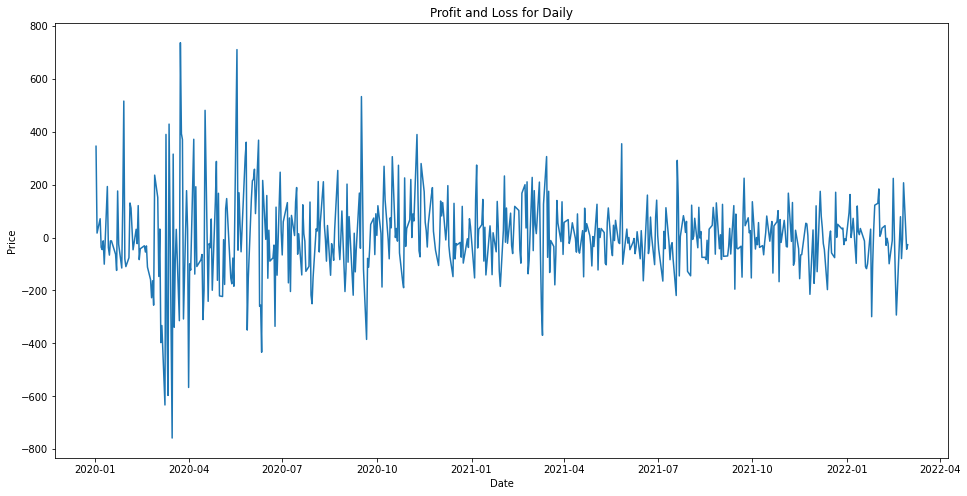

In [387]:
plt.figure(figsize=(16,8))
plt.plot(df['PnL'])
plt.title('Profit and Loss for Daily')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

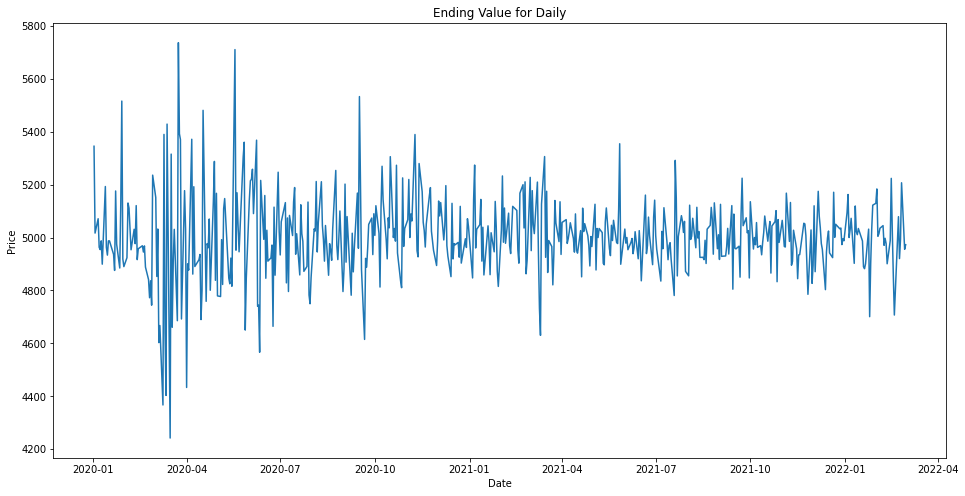

In [388]:
plt.figure(figsize=(16,8))
plt.plot(df['End'])
plt.title('Ending Value for Daily')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [389]:
Shares = round(int(float(Start) / df['Adj Close'][0]),1)
Purchase_Price = df['Adj Close'][0] # Invest in the Beginning Price
Current_Value = df['Adj Close'][-1] # Value of stock of Ending Price
Purchase_Cost = Shares * Purchase_Price
Current_Value = Shares * Current_Value
Profit_or_Loss = Current_Value - Purchase_Cost 

In [390]:
percentage_gain_or_loss = (Profit_or_Loss/Current_Value) * 100
percentage_returns = (Current_Value - Purchase_Cost)/ Purchase_Cost 
net_gains_or_losses = (df['Adj Close'][-1] - df['Adj Close'][0]) / df['Adj Close'][0]
total_return = ((Current_Value/Purchase_Cost)-1) * 100

In [391]:
print("Financial Analysis")
print('-' * 50)
print(market + ' profit or loss of $%.2f' % (Profit_or_Loss))
print('Percentage gain or loss: %s %%' % round(percentage_gain_or_loss,2))
print('Percentage of returns: %s %%' % round(percentage_returns,2))
print('Net gains or losses: %s %%' % round(net_gains_or_losses,2))
print('Total Returns: %s %%' % round(total_return,2))

Financial Analysis
--------------------------------------------------
GE profit or loss of $360.65
Percentage gain or loss: 6.78 %
Percentage of returns: 0.07 %
Net gains or losses: 0.07 %
Total Returns: 7.27 %


In [392]:
df



,Open,High,Low,Close,Adj Close,Volume,Gain,Shares,PnL,End
Date,,,,,,,,,,
2019-12-31,88.000000,89.279999,87.680000,89.279999,88.549828,7082250,NaN,NaN,NaN,NaN
2020-01-02,89.839996,95.680000,89.839996,95.440002,94.659447,10927725,6.899640,56.465384,344.981990,5344.981990
2020-01-03,92.559998,96.000000,92.239998,95.760002,94.976822,10735725,0.335281,52.820930,16.764052,5016.764052
2020-01-06,94.720001,97.680000,94.720001,97.120003,96.325699,13993588,1.420217,52.644423,71.010849,5071.010849
2020-01-07,97.199997,97.919998,95.360001,96.400002,95.611595,8822413,-0.741343,51.907228,-37.067143,4962.932857
...,...,...,...,...,...,...,...,...,...,...
2022-02-23,93.790001,94.860001,92.309998,92.650002,92.650002,7376500,-1.593202,53.106744,-79.660116,4920.339884
2022-02-24,90.589996,93.089996,87.699997,92.540001,92.540001,11392400,-0.118727,53.966540,-5.936352,4994.063648
2022-02-25,93.410004,97.419998,93.059998,96.370003,96.370003,6971400,4.138753,54.030689,206.937637,5206.937637


In [393]:
df=df[['Close']]
df

,Close
Date,
2019-12-31,89.279999
2020-01-02,95.440002
2020-01-03,95.760002
2020-01-06,97.120003
2020-01-07,96.400002
...,...
2022-02-23,92.650002
2022-02-24,92.540001
2022-02-25,96.370003


In [423]:
future_days=30
df['Predictions']=df[['Close']].shift(-future_days)
df

,Close,Predictions
Date,,
2019-12-31,89.279999,103.519997
2020-01-02,95.440002,102.639999
2020-01-03,95.760002,102.000000
2020-01-06,97.120003,100.879997
2020-01-07,96.400002,100.239998
...,...,...
2022-02-23,92.650002,NaN
2022-02-24,92.540001,NaN
2022-02-25,96.370003,NaN


In [424]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [425]:
x=np.array(df.drop(['Predictions'],1))[:-future_days]
print(x)


[[ 89.27999878]
 [ 95.44000244]
 [ 95.76000214]
 [ 97.12000275]
 [ 96.40000153]
 [ 95.51999664]
 [ 95.27999878]
 [ 93.36000061]
 [ 96.95999908]
 [ 96.23999786]
 [ 94.95999908]
 [ 94.72000122]
 [ 94.48000336]
 [ 93.27999878]
 [ 90.95999908]
 [ 94.16000366]
 [ 93.68000031]
 [ 91.51999664]
 [ 93.83999634]
 [103.51999664]
 [101.83999634]
 [ 99.59999847]
 [ 98.08000183]
 [100.63999939]
 [102.87999725]
 [103.59999847]
 [102.63999939]
 [103.27999878]
 [102.80000305]
 [105.27999878]
 [103.51999664]
 [102.63999939]
 [102.        ]
 [100.87999725]
 [100.23999786]
 [ 98.        ]
 [ 94.87999725]
 [ 90.55999756]
 [ 87.59999847]
 [ 83.12000275]
 [ 87.04000092]
 [ 89.68000031]
 [ 87.04000092]
 [ 87.59999847]
 [ 80.63999939]
 [ 75.19999695]
 [ 65.68000031]
 [ 70.80000305]
 [ 65.68000031]
 [ 57.84000015]
 [ 62.79999924]
 [ 53.27999878]
 [ 56.63999939]
 [ 52.79999924]
 [ 51.84000015]
 [ 52.15999985]
 [ 48.88000107]
 [ 56.08000183]
 [ 60.47999954]
 [ 64.95999908]
 [ 60.95999908]
 [ 63.11999893]
 [ 63.52

In [426]:
y=np.array(df['Predictions'])[:-future_days]
print(y)

[103.51999664 102.63999939 102.         100.87999725 100.23999786
  98.          94.87999725  90.55999756  87.59999847  83.12000275
  87.04000092  89.68000031  87.04000092  87.59999847  80.63999939
  75.19999695  65.68000031  70.80000305  65.68000031  57.84000015
  62.79999924  53.27999878  56.63999939  52.79999924  51.84000015
  52.15999985  48.88000107  56.08000183  60.47999954  64.95999908
  60.95999908  63.11999893  63.52000046  56.31999969  55.20000076
  53.84000015  57.84000015  56.24000168  58.40000153  57.11999893
  56.15999985  55.43999863  52.          49.91999817  54.72000122
  52.08000183  51.84000015  51.43999863  52.15999985  50.08000183
  51.43999863  54.40000153  52.63999939  54.40000153  52.
  49.68000031  49.59999847  47.84000015  48.88000107  50.31999969
  49.52000046  48.          46.31999969  45.59999847  43.91999817
  50.15999985  49.68000031  51.36000061  51.84000015  51.27999878
  54.40000153  58.31999969  54.24000168  52.56000137  54.08000183
  56.40000153  58.

In [427]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr = LinearRegression().fit(x_train, y_train)


In [428]:
x_future=df.drop(['Predictions'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[ 92.76999664],
       [ 96.01000214],
       [ 97.55000305],
       [ 98.27999878],
       [ 97.83000183],
       [ 96.94999695],
       [ 93.12999725],
       [ 92.11000061],
       [ 92.08000183],
       [ 92.52999878],
       [ 91.44999695],
       [ 89.98000336],
       [ 93.05999756],
       [ 93.06999969],
       [ 94.        ],
       [ 94.62000275],
       [ 95.30000305],
       [ 94.79000092],
       [ 94.69999695],
       [ 94.47000122],
       [ 96.23999786],
       [ 99.37000275],
       [ 99.37000275],
       [ 99.94999695],
       [101.40000153],
       [ 99.41999817],
       [101.79000092],
       [102.23999786],
       [102.45999908],
       [103.16000366]])

In [429]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[91.29997349 93.95170411 95.2120932  95.80954651 95.44125371 94.72102781
 91.59461023 90.75981031 90.73525829 91.10355108 90.21964088 89.01654816
 91.5373201  91.54550619 92.30665004 92.81408136 93.37061673 92.95321364
 92.87955134 92.69131502 94.13994043 96.7016428  96.7016428  97.17632977
 98.3630628  96.74256076 98.68225155 99.05054435 99.23060083 99.80350836]


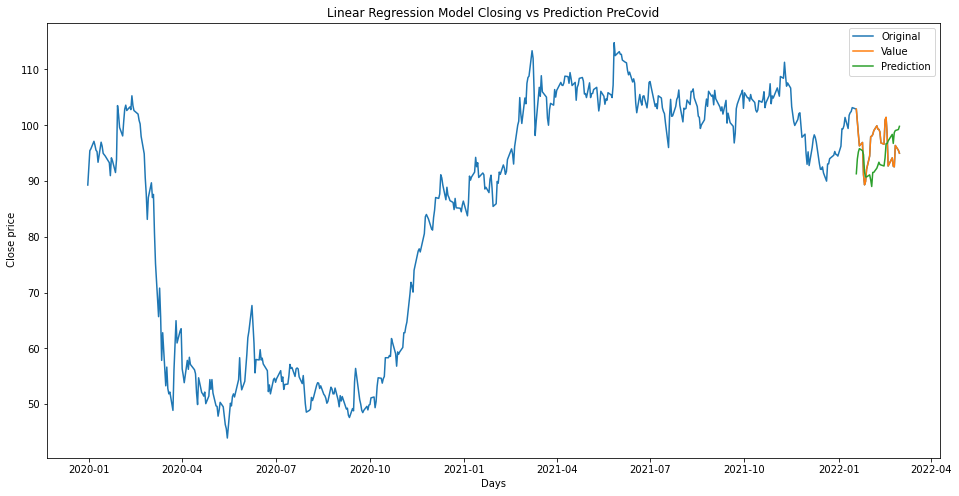

In [437]:
predictions= lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model Closing vs Prediction PreCovid')
plt.xlabel('Days')
plt.ylabel(' Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()

<AxesSubplot:>

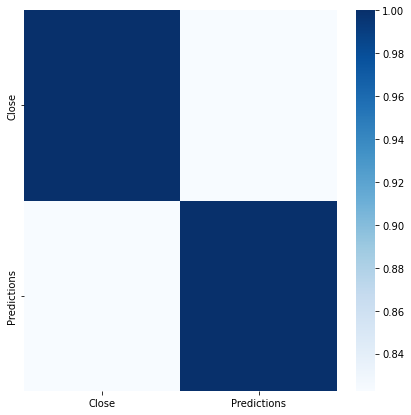

In [438]:
plt.figure(figsize=(7,7))
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

In [439]:
valid

,Close,Predictions
Date,,
2022-01-18,102.889999,91.299973
2022-01-19,100.620003,93.951704
2022-01-20,98.250000,95.212093
2022-01-21,96.300003,95.809547
2022-01-24,96.910004,95.441254
2022-01-25,91.110001,94.721028
2022-01-26,89.320000,91.594610
2022-01-27,89.900002,90.759810
2022-01-28,92.099998,90.735258
